In [2]:
import pandas as pd

dataset_url = "https://raw.githubusercontent.com/gizayceylan/FakeNews/main/Datasets/fakeddit_small_2_way.csv"

# Load CSV
df = pd.read_csv(dataset_url)

# Show shape and sample rows
print("Shape:", df.shape)
df.head()

Shape: (50000, 16)


,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,mynameisdom,louisiana town evacuated after million pounds ...,1.354723e+09,newsfeed.time.com,True,14bs3u,https://external-preview.redd.it/_ozmfuaU9hest...,NaN,7.0,30,nottheonion,Louisiana Town Evacuated after 6 Million Pound...,0.78,1,0,0
1,Cardboard95,christiano ronaldo to meet child who lost both...,1.447980e+09,thesportbible.com,True,3ti8nn,https://external-preview.redd.it/lr07F7LhboTVx...,NaN,4.0,33,upliftingnews,Christiano Ronaldo to meet child who lost both...,0.90,1,0,0
2,lukalucasluka,qizai the only brown panda in the world,1.476728e+09,i.redd.it,True,57ytnj,https://preview.redd.it/jkh0z1iqr2sx.jpg?width...,NaN,33.0,1639,photoshopbattles,"PsBattle: Qizai, the only brown panda in the w...",0.97,1,0,0
3,bfwilley,san francisco suspect accused of hate crime in...,1.504455e+09,sanfrancisco.cbslocal.com,True,6xu1o8,https://external-preview.redd.it/szJi1N4Ud4ABH...,NaN,0.0,10,usanews,San Francisco Suspect Accused Of Hate Crime In...,1.00,1,0,0
4,freethinker78,state doctors wife mishandled vaccines caused ...,1.563820e+09,wkyt.com,True,cgguvv,https://external-preview.redd.it/JRFIUMuql9pOJ...,NaN,0.0,22,usnews,"State: Doctor's wife mishandled vaccines, caus...",0.85,1,0,0


In [3]:
# Keep only rows that have images
df = df[df['image_url'].notna()]

# Check label distribution
label_counts = df['2_way_label'].value_counts().sort_index()
label_percent = df['2_way_label'].value_counts(normalize=True).sort_index() * 100

# Combine into one table for display
balance_df = pd.DataFrame({
    'Label': ['Fake (0)', 'Real (1)'],
    'Count': label_counts.values,
    'Percentage': label_percent.values.round(2)
})

balance_df

,Label,Count,Percentage
0,Fake (0),24963,50.08
1,Real (1),24882,49.92


In [4]:
# Fake examples (label = 0)
df[df['2_way_label'] == 0][['clean_title', 'image_url']].sample(5)


,clean_title,image_url
42769,life the places you can vomit in the jungle,https://external-preview.redd.it/0msIcMsIaWfbt...
42583,cutouts,http://i.imgur.com/Lkfhkw2%2ejpg
39349,i did almost the same thing but my post got re...,http://i.imgur.com/Qq14PeU.jpg
30453,marsupica ca ca ca ca,https://i.imgur.com/TvauxIN.jpg
28306,a girl taking her shirt off,https://external-preview.redd.it/9aBjzEy4iBLUD...


In [5]:
# Real examples (label = 1)
df[df['2_way_label'] == 1][['clean_title', 'image_url']].sample(5)


,clean_title,image_url
1394,these millipedes congregating in a crack in an...,https://preview.redd.it/ddslfvbsxnj11.jpg?widt...
17346,wrong door,https://external-preview.redd.it/h4yBdfiY43GQc...
14987,the way that the wood is cut around the tree,https://preview.redd.it/nt0ekhkspqt31.jpg?widt...
607,my first new car only has miles on it,https://preview.redd.it/xl643qf0nwn11.jpg?widt...
21632,the visa brochure in my hotel room looks like ...,https://preview.redd.it/x26av3czaw631.jpg?widt...


<Axes: title={'center': 'Top 10 Subreddits'}, ylabel='subreddit'>

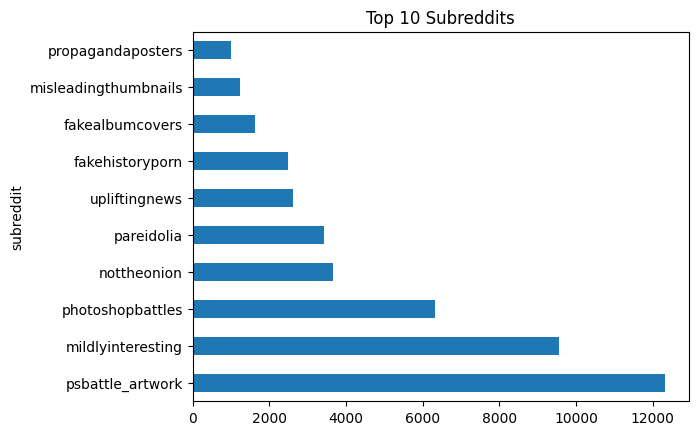

In [6]:
df['subreddit'].value_counts().head(10).plot(kind='barh', title="Top 10 Subreddits")


In [7]:
from IPython.display import Image, display

for url in df['image_url'].sample(3):
    display(Image(url=url))
